In [1]:
import numpy as np
import argparse
import os, time

from pykin.utils import plot_utils as p_utils

from pytamp.benchmark import Rearrange1
from pytamp.benchmark.rearrange1 import make_scene
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement
from pytamp.utils import point_cloud_utils as pc_utils

def get_parser():
    parser = argparse.ArgumentParser(description="Test Rearragement 1.")
    parser.add_argument("--budgets", metavar="T", type=int, default=30, help="Horizon")
    parser.add_argument("--max_depth", metavar="H", type=int, default=14, help="Max depth")
#     parser.add_argument("--seed", metavar="i", type=int, default=7, help="A random seed")
#     parser.add_argument("--seed", metavar="i", type=int, default=17, help="A random seed")
    parser.add_argument("--seed", metavar="i", type=int, default=22, help="A random seed")
    parser.add_argument(
        "--algo",
        metavar="alg",
        type=str,
        default="bai_perturb",
        choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
        help="Choose one (bai_perturb, bai_ucb, uct)",
    )
    parser.add_argument(
        "--debug_mode", default=False, type=lambda x: (str(x).lower() == "true"), help="Debug mode"
    )
#     parser.add_argument("--box_number", metavar="N", type=int, default=6, help="Box Number(6 or less)")
    try:
        args = parser.parse_args() #call from command line
    except:
        args = parser.parse_args(args=[]) #call from notebook
    return args 

args = get_parser() 

debug_mode = args.debug_mode
# debug_mode = True
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
np.random.seed(seed)

object_names, init_scene, goal_scene = make_scene()
rearrangement1 = Rearrange1('panda', object_names, init_scene, goal_scene, is_pyplot=False)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)


2023-08-03 22:24:07.942650: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-3e66d8a2-aaf5-423a-85c5-2f2beaa68045.json


table  o_pose :  [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
ben_cube0  o_pose :  [[-0.99833062  0.05775794  0.         -0.34006171]
 [-0.05775794 -0.99833062  0.          0.59777838]
 [ 0.          0.          1.          0.79229998]
 [ 0.          0.          0.          1.        ]]
bottle0  o_pose :  [[-0.44628384 -0.89489147  0.         -0.21132009]
 [ 0.89489147 -0.44628384  0.          0.49846736]
 [ 0.          0.          1.          0.83215735]
 [ 0.          0.          0.          1.        ]]
can0  o_pose :  [[-0.98551936 -0.16956296  0.         -0.26125986]
 [ 0.16956296 -0.98551936  0.          0.87988355]
 [ 0.          0.          1.          0.80759666]
 [ 0.          0.          0.          1.        ]]
cereal0  o_pose :  [[-0.67457655  0.7382049   0.         -0.47868132]
 [-0.7382049  -0.67457655  0.          0.41233326]
 [ 0.          0.          1.          0.84226188]
 [ 0.          0.          0.          1.        ]]
table  o_pose :  [[1. 0. 0.

In [2]:
c = 2.5
idx = 0
mcts = MCTS_rearrangement(
        scene_mngr=rearrangement1.scene_mngr,
        init_scene=rearrangement1.init_scene,
        sampling_method=args.algo,
        budgets=args.budgets,
        max_depth=args.max_depth,
        c=c,
        debug_mode=args.debug_mode,
        use_pick_action=False,
        consider_next_scene=True, 
    )
mcts.only_optimize_1 = False

2023-08-03 22:24:09.698566: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-08-03 22:24:09.740613: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-03 22:24:09.740807: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3080 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 68 deviceMemorySize: 9.77GiB deviceMemoryBandwidth: 707.88GiB/s
2023-08-03 22:24:09.740851: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-08-03 22:24:09.744115: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-08-03 22:24:09.744207: I tensorflow/stream_executor/plat

/home/juju/contact_graspnet/pointnet2/tf_ops/sampling
<module 'contact_graspnet.contact_graspnet' from '/home/juju/contact_graspnet/contact_graspnet/contact_graspnet.py'>
--- Get model
Instructions for updating:
Colocations handled automatically by placer.


/home/juju/contact_graspnet/contact_graspnet/config_utils.py:42: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  global_config = yaml.load(f)
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/legacy_tf_layers/normalization.py:307: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  warnings.warn(
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` i

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2023-08-03 22:24:11.873543: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-03 22:24:11.874255: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-03 22:24:11.874332: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3080 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 68 deviceMemorySize: 9.77GiB deviceMemoryBandwidth: 707.88GiB/s
2023-08-03 22:24:11.874377: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), 

INFO:tensorflow:Restoring parameters from /home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-144144


2023-08-03 22:24:12.130225: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-08-03 22:24:12.130245: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2023-08-03 22:24:12.130248: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2023-08-03 22:24:12.130381: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-03 22:24:12.130466: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-03 22:24:12.130518: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-

{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[ 0.55993829 -0.00222162  0.83529998]), 'bottle0': Object(name=bottle0, pos=[ 0.68867991 -0.10153264  0.87515735]), 'can0': Object(name=can0, pos=[0.63874014 0.27988355 0.85059666]), 'cereal0': Object(name=cereal0, pos=[ 0.42131868 -0.18766674  0.88526188])}
{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[ 0.47189415 -0.22862241  0.83529998]), 'bottle0': Object(name=bottle0, pos=[ 0.40412951 -0.10179989  0.87515735]), 'can0': Object(name=can0, pos=[ 0.6645213  -0.10141758  0.85059666]), 'cereal0': Object(name=cereal0, pos=[0.42014769 0.00883087 0.88526188])}


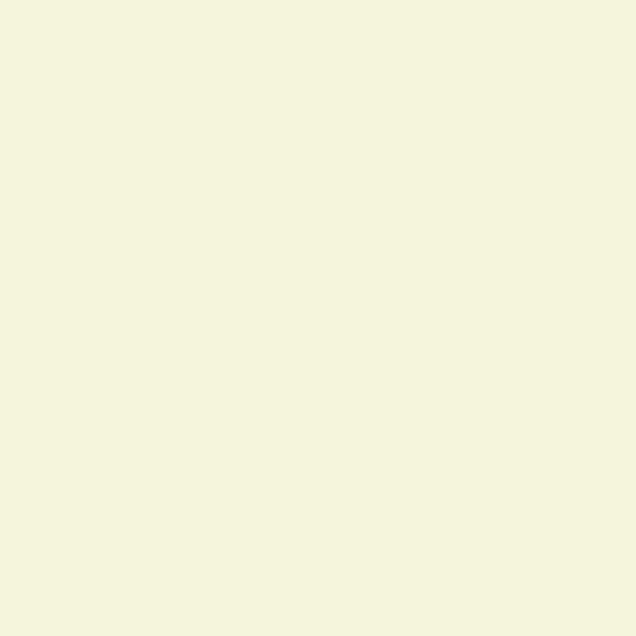

In [3]:
# #######################
fig, ax = p_utils.init_3d_figure(name="Rearrangement 1")
# init_scene
rearrangement1.scene_mngr.render_scene(ax)
rearrangement1.render_axis(rearrangement1.scene_mngr)
rearrangement1.scene_mngr.show()

# goal_scene
rearrangement1.goal_scene_mngr.render_scene(ax)
rearrangement1.render_axis(rearrangement1.goal_scene_mngr)
rearrangement1.goal_scene_mngr.show()

In [4]:
start_time = time.time()
for i in range(budgets):
# for i in range(10):
    print(
        f"\n[{idx+1}/{len(c_list)}] Benchmark: {rearrangement1.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
    )
    mcts.do_planning_rearrange(i)

    print("########### Running time : ", time.time()- start_time, "##############")
    final_level_1_values.append(mcts.values_for_level_1)



[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 22
=========== Search iteration : 1 ===========
[Action] Rearr bottle0
placed another place not goal
[Reward] S(0) -> A(3) -> S'(8) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(8) -> A(11) -> S'(15) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(15) -> A(20) -> S'(22) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(22) -> A(24) -> S'(29) Reward : 2.0
[Action] Rearr cereal0
Good Action
[Reward] S(29) -> A(34) -> S'(35) Reward : 1.667
[Action] Rearr can0
placed another place not goal
[Reward] S(35) -> A(39) -> S'(41) Reward : -1
[Action] Rearr cereal0
Bad Action
[Reward] S(41) -> A(45) -> S'(46) Reward : -2.857
[Action] Rearr can0
Good Action
[Reward] S(46) -> A(51) -> S'(52) Reward : 1.111
[Action] Rearr bottle0
placed another place not goal
[Reward] S(52) -> A(54) -> S'(57) Reward : -1
[Action] Rearr ben_cube0
Bad Action
[Reward] S(57) -> A(58) -> S'(62) Reward : 

2023-08-03 22:24:39.312578: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-08-03 22:24:39.683751: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-08-03 22:24:40.256766: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-08-03 22:24:40.339795: E tensorflow/stream_executor/cuda/cuda_blas.cc:226] failed to create cublas handle: CUBLAS_STATUS_NOT_INITIALIZED
2023-08-03 22:24:40.348460: I tensorflow/stream_executor/cuda/cuda_driver.cc:789] failed to allocate 128.00M (134217728 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2023-08-03 22:24:40.348765: I tensorflow/stream_executor/cuda/cuda_driver.cc:789] failed to allocate 115.20M (120796160 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2023-08-03 22:24:40.348988: I tensorflow/stream_executor/cuda/cuda_driver.cc:789] failed to allocate 103.68

2023-08-03 22:25:00.426004: I tensorflow/stream_executor/cuda/cuda_driver.cc:789] failed to allocate 128.00M (134217728 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2023-08-03 22:25:00.427557: I tensorflow/stream_executor/cuda/cuda_driver.cc:789] failed to allocate 128.00M (134217728 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2023-08-03 22:25:00.427606: W tensorflow/core/common_runtime/bfc_allocator.cc:456] Allocator (GPU_0_bfc) ran out of memory trying to allocate 64.00MiB (rounded to 67108864)requested by op layer1/conv1_2/Conv2D
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-08-03 22:25:00.427636: I tensorflow/core/common_runtime/bfc_allocator.cc:991] BFCAllocator dump for GPU_0_bfc
2023-08-03 22:25:00.427655: I tensorflow/core/common_runtime/bfc_allocator.cc:998] Bin (256): 	Total Chunks: 

KeyboardInterrupt: 

In [7]:
max_level_1_value = mcts.get_max_value_level_1()
print(max_level_1_value, mcts.history_level_1_dict)

########## level 1 ##########
if mcts.history_level_1_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    print()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))
#     mcts.render_rearr("_", max_value_nodes)

12.995238095238095 {0: {'nodes': [0, 1, 82, 84, 88, 93, 95, 100, 101, 102, 107, 110, 112, 114, 117, 121, 122], 'value': 7.894444444444446}, 1: {'nodes': [0, 4, 193, 194, 200, 205, 206, 207, 212, 215, 217, 219, 222], 'value': 12.995238095238095}, 2: {'nodes': [0, 4, 193, 195, 506, 510, 511, 512, 516, 518, 521, 523, 526, 527, 530, 533, 534, 535, 538, 540, 544, 546, 550, 553, 555, 559, 560], 'value': 5.556532356532356}, 3: {'nodes': [0, 1, 82, 84, 88, 90, 1092, 1096, 1098, 1102, 1103, 1107, 1108], 'value': 11.328571428571427}, 4: {'nodes': [0, 1, 82, 84, 88, 94, 1236, 1238, 1241, 1243, 1247, 1249, 1253, 1257, 1258, 1259, 1261, 1266, 1267, 1272, 1273, 1277, 1278, 1281, 1283, 1287, 1288], 'value': 2.8458541458541453}, 5: {'nodes': [0, 4, 193, 194, 200, 205, 206, 209, 1685, 1687, 1691, 1695, 1697, 1700, 1702], 'value': 10.145238095238096}, 6: {'nodes': [0, 1, 82, 84, 88, 93, 95, 97, 1703, 1705, 1709, 1713, 1714, 1718, 1719], 'value': 9.311904761904762}}

Result 1 :  [0, 4, 193, 194, 200, 205

In [8]:
mcts.history_level_2_dict

{0: {'nodes': [0,
   1,
   82,
   84,
   88,
   93,
   95,
   100,
   101,
   102,
   107,
   110,
   112,
   114,
   117,
   121,
   122],
  'value': 8.293344},
 1: {'nodes': [0, 4, 193, 194, 200, 205, 206, 207, 212, 215, 217, 219, 222],
  'value': 8.293344}}

In [11]:
########## level 1 ##########
if mcts.history_level_2_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))

Result 1 :  [0, 4, 193, 194, 200, 205, 206, 207, 212, 215, 217, 219, 222]
state num : 13


In [12]:
max_value_nodes, mcts.level_wise_2_success

([0, 4, 193, 194, 200, 205, 206, 207, 212, 215, 217, 219, 222], True)

In [22]:
mcts.optimal_nodes

[0, 1, 82, 84, 88, 93, 95, 100, 101, 102, 107, 110, 112, 114, 117, 121, 122]

In [24]:
final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []
if mcts.level_wise_2_success:
    (
        pnp_all_joint_paths,
        pick_all_objects,
        place_all_object_poses,
    ) = mcts.get_all_joint_path(max_value_nodes)
    final_pnp_all_joint_paths.append(pnp_all_joint_paths)
    final_pick_all_objects.append(pick_all_objects)
    final_place_all_object_poses.append(place_all_object_poses)
    final_optimal_nodes.append(mcts.optimal_nodes)
else:
    final_pnp_all_joint_paths.append([])
    final_pick_all_objects.append([])
    final_place_all_object_poses.append([])
    final_optimal_nodes.append([])

In [26]:
pick_all_objects, place_all_object_poses

([['bottle0', 'ben_cube0', 'cereal0', 'ben_cube0', 'can0', 'ben_cube0']],
 [[array([[ 0.46694576, -0.88428596,  0.        ,  0.40412951],
          [ 0.88428596,  0.46694576,  0.        , -0.10179989],
          [ 0.        ,  0.        ,  1.        ,  0.87515735],
          [ 0.        ,  0.        ,  0.        ,  1.        ]]),
   array([[-0.99292188,  0.11876924,  0.        ,  0.3434959 ],
          [-0.11876924, -0.99292188,  0.        , -0.37823003],
          [ 0.        ,  0.        ,  1.        ,  0.83529998],
          [ 0.        ,  0.        ,  0.        ,  1.        ]]),
   array([[-0.25346519,  0.96734451,  0.        ,  0.42014769],
          [-0.96734451, -0.25346519,  0.        ,  0.00883087],
          [ 0.        ,  0.        ,  1.        ,  0.88526188],
          [ 0.        ,  0.        ,  0.        ,  1.        ]]),
   array([[ 0.14487551,  0.98944989,  0.        ,  0.28683343],
          [-0.98944989,  0.14487551,  0.        ,  0.11910617],
          [ 0.        , 

In [27]:
final_pnp_all_joint_paths

[[[OrderedDict([('pre_grasp',
                 [array([-0.0417497 , -0.47334403,  0.03126204, -2.64734837,  0.06987232,
                          2.24423545, -0.81607676]),
                  array([-0.08349939, -0.40820988,  0.06252408, -2.60056614,  0.13974465,
                          2.26735583, -0.84675536]),
                  array([-0.12524909, -0.34307573,  0.09378612, -2.55378391,  0.20961697,
                          2.29047621, -0.87743396]),
                  array([-0.16699879, -0.27794158,  0.12504816, -2.50700168,  0.27948929,
                          2.31359659, -0.90811256]),
                  array([-0.20874848, -0.21280743,  0.1563102 , -2.46021945,  0.34936162,
                          2.33671697, -0.93879117]),
                  array([-0.25049818, -0.14767329,  0.18757224, -2.41343722,  0.41923394,
                          2.35983735, -0.96946977]),
                  array([-0.29224788, -0.08253914,  0.21883428, -2.36665499,  0.48910627,
                      

In [28]:
for i in mcts.history_level_2_dict[0]['nodes']:
    if not mcts.tree.nodes[i]['level1_5']:
        print("Error 1.5", i)
for i in mcts.history_level_2_dict[0]['nodes']:
    if not mcts.tree.nodes[i]['level2']:
        print("Error 2", i)
        

Error 1.5 122


In [29]:
mcts.tree.nodes[0]['state'].objs

{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]),
 'ben_cube0': Object(name=ben_cube0, pos=[ 0.55993829 -0.00222162  0.83529998]),
 'bottle0': Object(name=bottle0, pos=[ 0.68867991 -0.10153264  0.87515735]),
 'can0': Object(name=can0, pos=[0.63874014 0.27988355 0.85059666]),
 'cereal0': Object(name=cereal0, pos=[ 0.42131868 -0.18766674  0.88526188])}

0 scene
100 scene
200 scene
300 scene
400 scene
500 scene
600 scene
700 scene
800 scene
900 scene
1000 scene
1100 scene
Animation Finished..
PWD :  /home/juju/pytamp/examples/doosan/action/rearrangement1/movie_dir
Save finished..


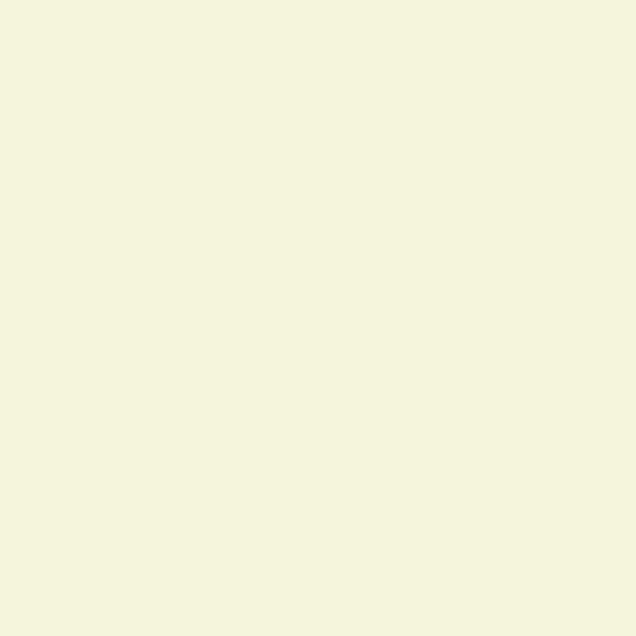

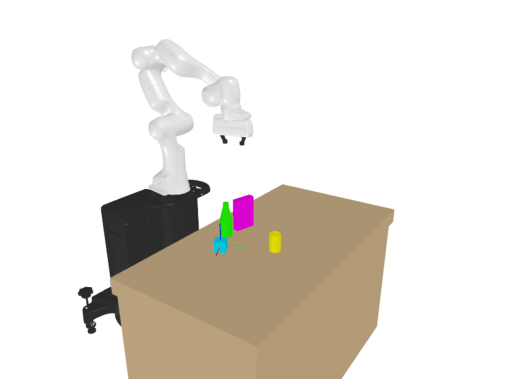

In [30]:
from pykin.utils.kin_utils import apply_robot_to_scene

mcts.rearr_action.scene_mngr.render.render_objects(mcts.tree.nodes[0]['state'].objs)
# pick.scene_mngr.render.trimesh_scene = apply_robot_to_scene(
#         trimesh_scene=pick.scene_mngr.render.trimesh_scene, 
#         robot=pick.scene_mngr.scene.robot,
#         geom="visual"
#             )
# pick.scene_mngr.render.set_camera_view()

mcts.rearr_action.simulate_path(
    final_pnp_all_joint_paths[0],
    final_pick_all_objects[0],
    final_place_all_object_poses[0],
    is_save=True,
#     video_name="pick_rearrangement1_only_current_scene",
    video_name="pick_rearrangement1_consider_next_scene",
)


In [13]:
mcts.rearr_action.scene_mngr.scene.objs

{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]),
 'ben_cube0': Object(name=ben_cube0, pos=[ 0.47189415 -0.17278644  0.83529998]),
 'bottle0': Object(name=bottle0, pos=[ 0.40412951 -0.07766955  0.87515735]),
 'can0': Object(name=can0, pos=[ 0.6645213  -0.07738281  0.85059666]),
 'cereal0': Object(name=cereal0, pos=[0.42014769 0.00530352 0.88526188])}

In [21]:
from pytamp.search.node_data import NodeData

action = mcts.tree.nodes[195].get(NodeData.ACTION)
'grasp' in list(action.keys())

False

In [15]:
from pytamp.search.node_data import NodeData

visited_nodes = [
                True for n in max_value_nodes if mcts.tree.nodes[n][NodeData.LEVEL1_5] is True
            ]
# visited_nodes.append(False)
all(visited_nodes)

True

# Get first & last scene per node

In [55]:
i = 0
current_node = mcts.tree.nodes[max_value_nodes[2*i + 1]]
next_node = mcts.tree.nodes[max_value_nodes[2*i + 2]]

In [17]:
for i in next_node['joints'][0]:
    _ = next_node['joints'][0]
    print(i)
    first_joint = _[i][0]
    last_joint = _[i][-1]
    print(f"{i}'s first joints : ", first_joint)
    print(f"{i}'s last joints : ", last_joint)

pre_grasp
pre_grasp's first joints :  [ 1.59875977e-02  2.33460937e-01  9.32852109e-03 -2.30543127e+00
 -1.94288206e-03  2.59642431e+00 -8.52161359e-01]
pre_grasp's last joints :  [ 0.13878074  0.92266739  0.16746391 -1.49200986 -0.00698525  2.27942866
 -2.05617986]
grasp
grasp's first joints :  [ 0.13878074  0.92266739  0.16746391 -1.49200986 -0.00698525  2.27942866
 -2.05617986]
grasp's last joints :  [ 0.1530003   1.01344772  0.16117063 -1.4700854  -0.01239578  2.34895925
 -2.05326445]
post_grasp
post_grasp's first joints :  [ 0.1530003   1.01344772  0.16117063 -1.4700854  -0.01239578  2.34895925
 -2.05326445]
post_grasp's last joints :  [ 0.1438158   0.90359212  0.17016521 -1.527412   -0.0057249   2.29665627
 -2.04780251]
default_grasp
default_grasp's first joints :  [ 0.14176572  0.8877146   0.16843497 -1.54345802 -0.00630722  2.29219422
 -2.01563568]
default_grasp's last joints :  [ 0.00000000e+00  1.96349541e-01  4.33680869e-19 -2.35619449e+00
  0.00000000e+00  2.61799388e+00 -7

In [56]:
def render_rearr_state(action, ax, title, next_node, current_node):
#     action.scene_mngr.set_robot_eef_pose(next_node['joints'][0]['grasp'][-1])
    action.scene_mngr.set_robot_eef_pose(mcts.rearr_action.scene_mngr.scene.robot.init_qpos)

    action.scene_mngr.render_robot(ax,action.scene_mngr.scene)
    action.scene_mngr.render_objects(ax, current_node['state'])
    action.render_axis(action.scene_mngr)
    action.scene_mngr.render_axis(ax, current_node['grasp_poses'][0]['grasp'])
    
    q_thetas = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
        mcts.rearr_action.scene_mngr.scene.robot.init_qpos,
        current_node['grasp_poses'][0]['grasp']
        )

    action.scene_mngr.set_robot_eef_pose(q_thetas)

    mcts.rearr_action.scene_mngr.render_gripper(ax)

    action.scene_mngr.render_axis(ax, current_node['grasp_poses'][0]['pre_grasp'])
    action.scene_mngr.render_axis(ax, current_node['grasp_poses'][0]['post_grasp'])
    action.show()

In [57]:
render_rearr_state(mcts.rearr_action, None, "1", next_node, current_node)

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0084 sec



In [15]:
mcts.rearr_action.scene_mngr.scene.robot.init_qpos

array([ 6.33525628e-13, -5.38478180e-01,  5.44820130e-12, -2.69413060e+00,
        2.15158886e-12,  2.22111507e+00, -7.85398163e-01])

In [41]:
mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_pose()

array([[-4.91581748e-04,  9.97858672e-01,  6.54051098e-02,
         5.19275050e-01],
       [ 9.99999879e-01,  4.92636585e-04, -9.46554640e-12,
        -3.00136249e-12],
       [-3.22209594e-05,  6.54051019e-02, -9.97858793e-01,
         1.46586664e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [45]:
offset = np.zeros((4,4))
offset[0,3] = -0.15

In [46]:
q_thetas = mcts.rearr_action.scene_mngr.scene.robot.inverse_kin(
    mcts.rearr_action.scene_mngr.scene.robot.init_qpos,
    mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_pose() + offset,
)
q_thetas

solve the problem using LM2!! 
WorkingTime[inverse_kinematics]: 0.0066 sec



array([ 6.33525628e-13, -5.38478180e-01,  5.44820130e-12, -2.69413060e+00,
        2.15158886e-12,  2.22111507e+00, -7.85398163e-01])

In [48]:
q_thetas

array([ 6.33525628e-13, -5.38478180e-01,  5.44820130e-12, -2.69413060e+00,
        2.15158886e-12,  2.22111507e+00, -7.85398163e-01])

In [18]:
mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose()

array([[-4.88653487e-04,  9.91914615e-01,  1.26906102e-01,
         4.57231706e-01],
       [ 9.99999879e-01,  4.92636585e-04, -9.32454114e-12,
        -4.31918418e-12],
       [-6.25185978e-05,  1.26906086e-01, -9.91914735e-01,
         1.01204387e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

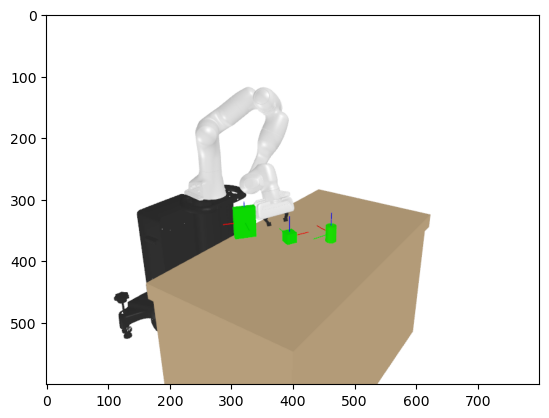

In [32]:
import matplotlib.pyplot as plt 
ax_trimesh = plt.gca()
# fig_trimesh = plt.figure()

mcts.rearr_action.scene_mngr.render_objects(None, next_node['state'])
for i in next_node['state'].objs:
    mcts.rearr_action.scene_mngr.render.render_obj_axis(None, next_node['state'].objs[i].h_mat)
mcts.rearr_action.scene_mngr.render.render_robot(robot=mcts.rearr_action.scene_mngr.scene.robot, geom=mcts.rearr_action.scene_mngr.geom)
mcts.rearr_action.scene_mngr.render.trimesh_scene.set_camera(
    angles=(1.2, 0, 0.6), distance=2, center=(0.5, 0, 1)
)
img = mcts.rearr_action.scene_mngr.render.get_scene_img(True)
# print(i ,"render")
plt.imshow(img)

In [ ]:

mcts.rearr_action.simulate_path(
    final_pnp_all_joint_paths[0],
    final_pick_all_objects[0],
    final_place_all_object_poses[0],
    is_save=True,
    video_name="pick_rearrangement1_level2_test_7_12",
)


In [ ]:
# mcts._level_wise_between_1_and_2_optimize(max_value_nodes)

In [ ]:
# import random
# from copy import deepcopy
# from pykin.utils.kin_utils import ShellColors as sc

# def get_grasp_action_using_contact_graspnet(success_level_1_sub_nodes):
#     node_length = int(len(success_level_1_sub_nodes)/2)
#     for i in range(node_length):
#         current_node = mcts.tree.nodes[success_level_1_sub_nodes[2*i + 1]]
#         next_node = mcts.tree.nodes[success_level_1_sub_nodes[2*i + 2]]
#         obj_to_manipulate =current_node['action']['rearr_obj_name']
        
#         print(f"{sc.COLOR_BROWN}{obj_to_manipulate}{sc.ENDC}")
#         for _ in range(2):
#             grasps = mcts.grasp_generator.get_grasp(
#                 init_scene = rearrangement1.init_scene,
#                 next_node = next_node,
#                 current_node = current_node,
#                 )
#             if len(grasps)>=1:
#                 grasp_poses_not_collision = mcts.grasp_generator.get_all_grasps(grasps)
#                 current_node[mcts.rearr_action.info.GRASP_POSES] = grasp_poses_not_collision
#                 break
#         g_ = random.sample(grasp_poses_not_collision,1)
#         next_node['action'].update(deepcopy(g_[0]))
        

In [ ]:
# get_grasp_action_using_contact_graspnet(max_value_nodes)

In [ ]:
# node_length = int(len(max_value_nodes)/2)
# node_length

# for i in range(node_length):
#     success_level_1_sub_nodes = max_value_nodes

#     current_node = mcts.tree.nodes[success_level_1_sub_nodes[2*i + 1]]
#     next_node = mcts.tree.nodes[success_level_1_sub_nodes[2*i + 2]]
#     obj_to_manipulate =current_node['action']['rearr_obj_name']
    
#     print(obj_to_manipulate)
#     for _ in range(2):
#         grasps = mcts.grasp_generator.get_grasp(
#             init_scene = rearrangement1.init_scene,
#             next_node = next_node,
#             current_node = current_node,
#             )
#         if len(grasps)>=1:
#             grasp_poses_not_collision = mcts.grasp_generator.get_all_grasps(grasps)
#             current_node[mcts.rearr_action.info.GRASP_POSES] = grasp_poses_not_collision
#             break
            
#     g_ = random.sample(grasp_poses_not_collision,1)
#     next_node['action'].update(deepcopy(g_[0]))

In [16]:
i = 2
current_node = mcts.tree.nodes[max_value_nodes[2*i + 1]]
next_node = mcts.tree.nodes[max_value_nodes[2*i + 2]]

In [17]:
current_node['state'].rearr_obj_name, next_node['state'].rearr_obj_name

('ben_cube0', 'cereal0')

In [18]:
next_node

{'number': 304,
 'visit': 2,
 'depth': 3,
 'state': <pytamp.scene.scene.Scene at 0x7f5c0032ce50>,
 'action': {'table': array([[-0.71264251, -0.70152737,  0.        ,  0.35238887],
         [ 0.70152737, -0.71264251,  0.        ,  0.02368256],
         [ 0.        ,  0.        ,  1.        ,  0.88526188],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]),
  'grasp': array([[-0.87924679, -0.39294609,  0.26929215,  0.275605  ],
         [-0.36708286,  0.91917598,  0.14270803,  0.09536066],
         [-0.30360341,  0.02662303, -0.95242643,  1.05189332],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]),
  'pre_grasp': array([[-0.8792468 , -0.3929461 ,  0.26929215,  0.2621404 ],
         [-0.36708286,  0.919176  ,  0.14270803,  0.08822525],
         [-0.3036034 ,  0.02662303, -0.95242643,  1.0995146 ],
         [ 0.        ,  0.        ,  0.        ,  1.        ]],
        dtype=float32),
  'post_grasp': array([[-0.8792468 , -0.3929461 ,  0.26929215,  0.275605  ],

In [19]:
current_node

{'depth': 3,
 'state': <pytamp.scene.scene.Scene at 0x7f5c69edb3a0>,
 'action': {'type': 'rearr',
  'rearr_obj_name': 'cereal0',
  'place_obj_name': 'table',
  'rearr_poses': [{'table': array([[-0.71264251, -0.70152737,  0.        ,  0.35238887],
           [ 0.70152737, -0.71264251,  0.        ,  0.02368256],
           [ 0.        ,  0.        ,  1.        ,  0.88526188],
           [ 0.        ,  0.        ,  0.        ,  1.        ]])}]},
 'value': 5,
 'value_history': [5, 5],
 'visit': 2,
 'number': 303,
 'type': 'action',
 'joints': [],
 'level1': True,
 'level2': False,
 'level1_5': True,
 'success': False,
 'cost': 0,
 'test': (),
 'grasp_poses': [{'grasp': array([[-0.87924679, -0.39294609,  0.26929215,  0.275605  ],
          [-0.36708286,  0.91917598,  0.14270803,  0.09536066],
          [-0.30360341,  0.02662303, -0.95242643,  1.05189332],
          [ 0.        ,  0.        ,  0.        ,  1.        ]]),
   'pre_grasp': array([[-0.8792468 , -0.3929461 ,  0.26929215,  0.26214

In [21]:
grasps = mcts.grasp_generator.get_grasp(
    init_scene=mcts.init_scene,
    next_node=next_node,
    current_node=current_node,
)

Extracted Region Cube Size:  0.4
Generated 90 grasps for object cereal0


In [31]:
grasp_poses_not_collision = mcts.grasp_generator.get_all_grasps(grasps)


In [35]:
mcts.rearr_action.scene_mngr.scene.robot.joint_limits_lower
mcts.rearr_action.scene_mngr.scene.robot.joint_limits_upper

[2.9671, 1.8326, 2.9671, 0.0, 2.9671, 3.8223, 2.9671]

In [33]:
for i in grasp_poses_not_collision:
    print(i)

{'grasp': array([[ 0.87747388,  0.39630197,  0.27015582,  0.25089969],
       [ 0.41267061, -0.91087073, -0.00417502,  0.10973725],
       [ 0.2444225 ,  0.11514885, -0.96280745,  1.03602643],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'pre_grasp': array([[ 0.8774739 ,  0.39630195,  0.27015582,  0.2373919 ],
       [ 0.4126706 , -0.91087073, -0.00417502,  0.109946  ],
       [ 0.24442251,  0.11514885, -0.9628075 ,  1.0841668 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32), 'post_grasp': array([[ 0.8774739 ,  0.39630195,  0.27015582,  0.2508997 ],
       [ 0.4126706 , -0.91087073, -0.00417502,  0.10973725],
       [ 0.24442251,  0.11514885, -0.9628075 ,  1.0860264 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32)}
{'grasp': array([[-0.8091509 , -0.38317924,  0.44547534,  0.2428585 ],
       [-0.41759816,  0.90834546,  0.02280534,  0.10073341],
       [-0.41338403, -0.16757675, -0.8950037 ,  1.0

grasp
pre_grasp
post_grasp
release
pre_release
post_release


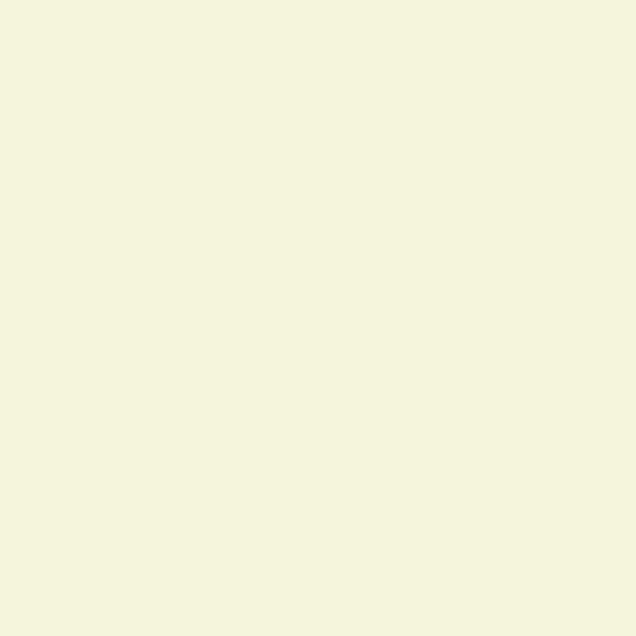

In [25]:
fig, ax = p_utils.init_3d_figure(name="Level wise 1")


for i,o in current_node['state'].objs.items():
    mcts.rearr_action.scene_mngr.set_object_pose(i,o.h_mat)
    
for action in next_node['action']:
    if 'grasp' in action or 'release' in action:
    
        print(action)
        mcts.rearr_action.scene_mngr.set_gripper_pose(next_node['action'][action])
        mcts.rearr_action.scene_mngr.render_gripper(ax)

#     mcts.rearr_action.scene_mngr.render_axis(ax, grasps['grasp'])
#     mcts.rearr_action.scene_mngr.render_axis(ax, grasps['pre_grasp'])
#     mcts.rearr_action.scene_mngr.render_axis(ax, grasps['post_grasp'])
#     mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    
mcts.rearr_action.scene_mngr.render_objects(ax)
p_utils.plot_basis(ax)
mcts.rearr_action.show()

grasp
pre_grasp
post_grasp
release
pre_release
post_release


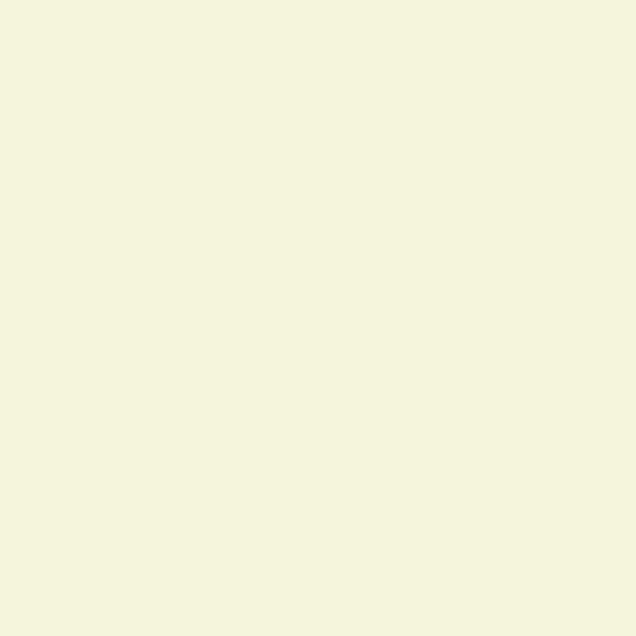

In [ ]:
fig, ax = p_utils.init_3d_figure(name="Level wise 1")


for i,o in next_node['state'].objs.items():
    mcts.rearr_action.scene_mngr.set_object_pose(i,o.h_mat)
    
for action in next_node['action']:
    if 'grasp' in action or 'release' in action:
    
        print(action)
        mcts.rearr_action.scene_mngr.set_gripper_pose(next_node['action'][action])
        mcts.rearr_action.scene_mngr.render_gripper(ax)

#     mcts.rearr_action.scene_mngr.render_axis(ax, grasps['grasp'])
#     mcts.rearr_action.scene_mngr.render_axis(ax, grasps['pre_grasp'])
#     mcts.rearr_action.scene_mngr.render_axis(ax, grasps['post_grasp'])
#     mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    
mcts.rearr_action.scene_mngr.render_objects(ax)
p_utils.plot_basis(ax)
mcts.rearr_action.show()

In [34]:
mcts.rearr_action.scene_mngr.render.render_objects(mcts.rearr_action.scene_mngr.scene.objs)

mcts.rearr_action.simulate_path(
    final_pnp_all_joint_paths[0],
    final_pick_all_objects[0],
    final_place_all_object_poses[0],
    is_save=True,
    video_name="pick_rearrangement1_level2_test_7_12",
)

IndexError: list index out of range

In [ ]:
next_node['state'].objs

{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]),
 'ben_cube0': Object(name=ben_cube0, pos=[ 0.39377654 -0.05920111  0.83529998]),
 'can0': Object(name=can0, pos=[0.58836741 0.27068778 0.85059666]),
 'cereal0': Object(name=cereal0, pos=[0.40992969 0.07529909 0.88526188])}